# FCNN versus CNN
This notebook is primarily concerned with recreating Figure 1 in **Why Are Convolutional Networks More Sample Efficient Than Fully-Connected Nets?** by Zhiyuan Li, Yi Zhang and Sanjeev Arora [1]. We have two lines of thought about this figure.

1. We wish to verify that the graphs are authentic and clarify their methods.
2. We believe that the graphs don't reflect the sample-complexity gap claimed in the abstract.

This notebook will address point 1.

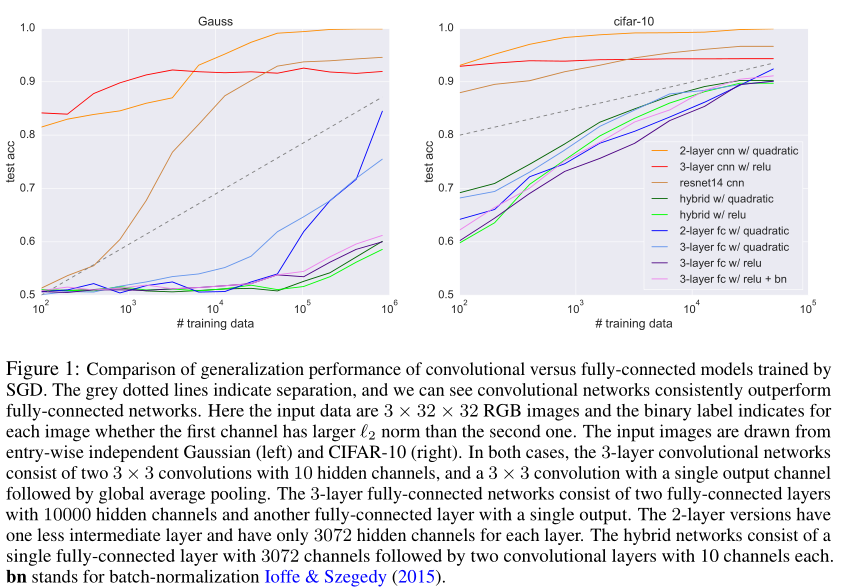

## 1. Methods

The original paper somewhat underspecifies their methods, so we mark in **bold** our assumptions and intepretations.

### Data

The inputs are $3\times8\times8$ RGB images. We will use training sets of increasing sizes from $10^2$ to $10^6$ and **test sets of size 10'000**. The training sets are constructed in the following manner.

+ Entry-wise independent Gaussian (mean 0, standard deviation 1)

The labels are binary, indicating whether the Red channel has larger $l_2$-norm than the Green channel. Mathematically, the label of an image $x$ is $\mathbb{1}[\sum_{i\in R}x_i^2 > \sum_{i\in G}x_i^2]$. As such, the Blue channel has no effect on the true label. 

### Models
1. 2-layer CNN
    + Convolution: One kernel per input channel of size 3x3, 10 output channels, stride size 1, and padding of 1, and bias
    + Activation function
    + Max pooling, kernel size 2x2, stride 2
    + Fully connected layer (160 in, 1 out) with bias
    + Sigmoid  
2. 2-layer "Dumb" CNN. (DCNN)
    + Convolution: One kernel per input channel of size 3x3, 2 output channels, stride size 1, and padding of 0, and bias
    + Activation function
    + Global average pooling, kernel size 8x8
    + Fully connected layer (160 in, 1 out) with bias
    + Sigmoid
2. 2-layer FCNN 
    + Fully connected layer (192 in, 3072 out) with bias
    + Activation function 
    + Fully connected layer (3072 in, 1 out) with bias
    + Sigmoid
    
For both models, we try both ReLU and Quadratic activation functions (in the convolutional, and hidden layer respectively). 
    
### Training algorithm
+ Stochastic Gradient Descent **with batch size 64**
+ The loss function is **BCELoss**
+ The **learning rate** is $\gamma = 0.01$
+ Training **stops** when **at least 10 epochs** have transpired and **training loss < 0.01** and **the rolling average of relative change in training loss < 0.01** with **window size 10**. It also stops after some maximum number of epochs.

### Model Evaluation
+ The model $M$ prediction is $\mathbb{1}[M(x)>0.5]$. Test accuracy is the percentage of correct predictions over the test set.

## 2. Experiment

In [1]:
# -min/max (int) The min/max order of magnitude for trainset size. Default 2/4.
# -s (int) The number training sample sets (of exponentially increasing size). Default 5.
# -f (str) The output .json file name (must contain an empty {}). Default test_acc.json
# -e (int) The maximum number of epochs to run the programme for. Default 20.

# Uncomment to run the experiment
# !python week1.py -min 2 -max 5 -f test_acc.json -s 10 -e 20

## 3. Results

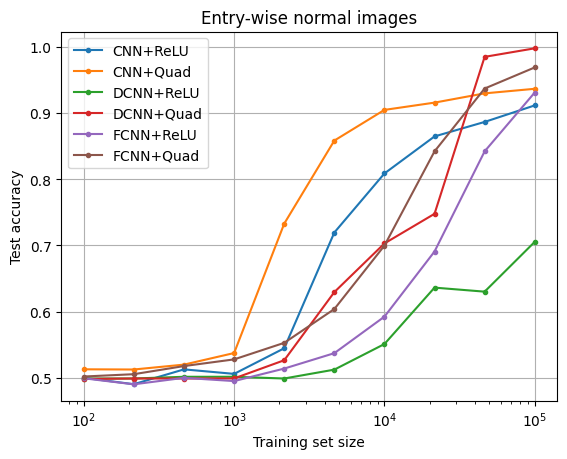

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from json import load

# Load data
file_path = 'test_acc.json'
with open(file_path, 'r') as json_file:
    test_acc = load(json_file)

# Create sorted dictionary out of saved data
new_dict = {}
for key in test_acc.keys():
    new_dict[int(key)]=test_acc[key]
sorted_dict = dict(sorted(new_dict.items()))

# Convert the dictionary to a format suitable for plotting
x_values = np.sort([int(key) for key in sorted_dict.keys()])  # Convert keys to integers

# Model names
names = ["CNN+ReLU", "CNN+Quad","DCNN+ReLU", "DCNN+Quad", "FCNN+ReLU","FCNN+Quad"]

# For every model, make line plot
for i, name in enumerate(names):
    
    # The accuracy values for increasing number of samples
    y_values = [value[i] for value in sorted_dict.values()]

    # Create a line plot
    plt.semilogx(x_values, y_values, marker='.', linestyle='-', label=name)
    
# Plot graphics
plt.xlabel('Training set size')
plt.ylabel('Test accuracy')
plt.title('Entry-wise normal images')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## References
1. [Why Are Convolutional Nets More Sample-Efficient than Fully-Connected Nets?](https://arxiv.org/abs/2010.08515) Zhiyuan Li, Yi Zhang, Sanjeev Arora, 2021
2. [Learning Multiple Layers of Features from Tiny Images](https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf), Alex Krizhevsky, 2009.